In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv('/Users/tejsharma/Downloads/suv_data.csv')
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


<Axes: xlabel='Age', ylabel='count'>

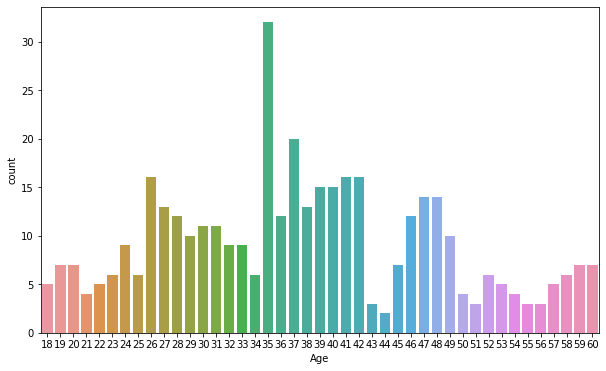

In [18]:
plt.figure(figsize=(10, 6))    #count plot with age
sns.countplot(x = 'Age', data = df)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Age'>

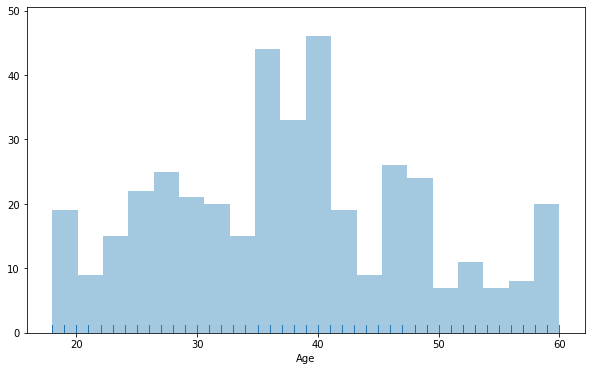

In [19]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Age'], bins=20, kde=False, rug=True)  #distplot with age 


<Axes: >

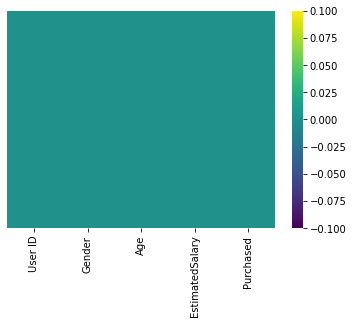

In [20]:
df.isnull()
df.isnull().sum()
sns.heatmap(df.isnull(), yticklabels= False, cmap= 'viridis')

In [21]:
df.drop(['User ID', 'Gender'], axis = 1, inplace = True)
df.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [34]:

# Drop the 'Purchased' column
X = df.drop('Purchased', axis=1)
y = df['Purchased']


In [28]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) #random_state = 0, generally gives the same result while running many times

In [30]:
from sklearn.preprocessing import StandardScaler 

In [41]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test = sc.transform(x_test)


In [42]:
from sklearn.linear_model import LogisticRegression  # Importing required model
model = LogisticRegression()  #creating instances 
model.fit(X_train,y_train)   # Training the model and fit model is used to train the model 
predict = model.predict(x_test) # making predection 
model.score(x_test,y_test)   # Calculate model accuracy

0.925

In [43]:
'''By using the classification_report, you can gain insights into the strengths and weaknesses of your classification 
model, identify areas for improvement, and make informed decisions about potential adjustments to your model or 
data preprocessing strategies.'''

from sklearn.metrics import classification_report
classification_report(y_test,predict)


'              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95        58\n           1       0.94      0.77      0.85        22\n\n    accuracy                           0.93        80\n   macro avg       0.93      0.88      0.90        80\nweighted avg       0.93      0.93      0.92        80\n'

In [44]:
'''The confusion matrix is a fundamental tool in classification tasks that helps you understand the performance
of a classification model in more detail. It provides a breakdown of how many samples were correctly or incorrectly 
classified for each class in a tabular format. Each row in the matrix represents the actual class, while each column 
represents the predicted class. The elements along the main diagonal (from top-left to bottom-right) represent the 
correct predictions, and the off-diagonal elements represent the misclassifications.'''

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict)

array([[57,  1],
       [ 5, 17]])

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.925